<a href="https://colab.research.google.com/github/Narayana8/awesome-python/blob/master/skincancerclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/dataset2/Test")
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/dataset2/Train")

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

177
118


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset='training',
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 177 files belonging to 9 classes.
Using 142 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset='validation',
    image_size=(img_height, img_width),
    batch_size=batch_size)



Found 177 files belonging to 9 classes.
Using 35 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


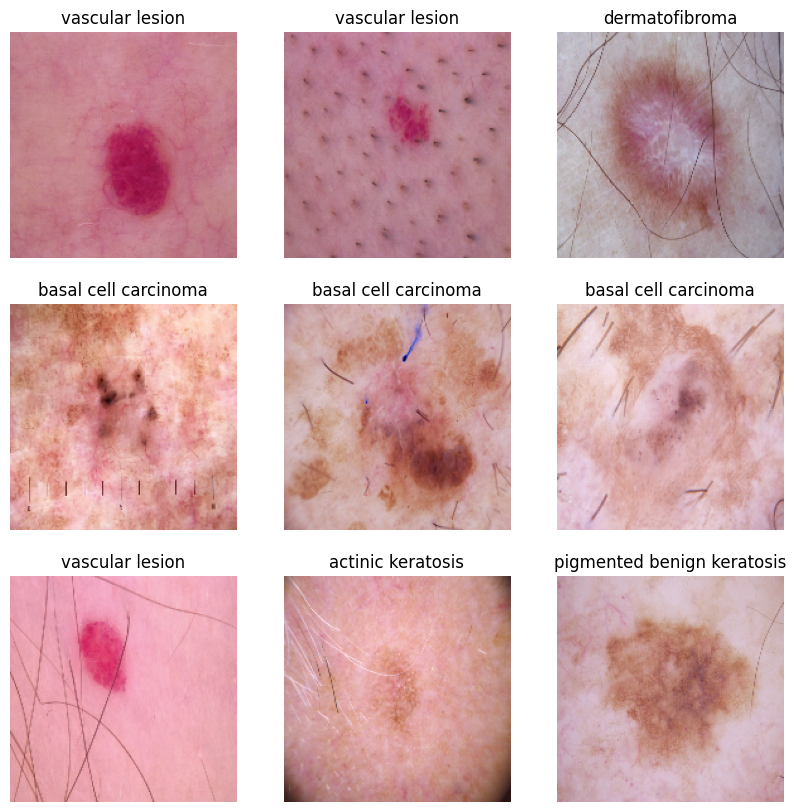

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")



In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = 9

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
5/5 [==============================] - 18s 4s/step - loss: 2.7655 - accuracy: 0.0915 - val_loss: 2.2895 - val_accuracy: 0.0571
Epoch 2/20
5/5 [==============================] - 4s 788ms/step - loss: 2.1643 - accuracy: 0.2042 - val_loss: 2.1767 - val_accuracy: 0.1714
Epoch 3/20
5/5 [==============================] - 4s 782ms/step - loss: 2.1245 - accuracy: 0.1831 - val_loss: 2.1951 - val_accuracy: 0.1429
Epoch 4/20
5/5 [==============================] - 6s 1s/step - loss: 1.9841 - accuracy: 0.2465 - val_loss: 2.2385 - val_accuracy: 0.2000
Epoch 5/20
5/5 [==============================] - 6s 1s/step - loss: 1.8401 - accuracy: 0.2817 - val_loss: 2.2813 - val_accuracy: 0.1714
Epoch 6/20
5/5 [==============================] - 4s 776ms/step - loss: 1.6548 - accuracy: 0.3803 - val_loss: 2.4154 - val_accuracy: 0.1143
Epoch 7/20
5/5 [==============================] - 5s 1s/step - loss: 1.5796 - accuracy: 0.4155 - val_loss: 2.3746 - val_accuracy: 0.1714
Epoch 8/20
5/5 [===============

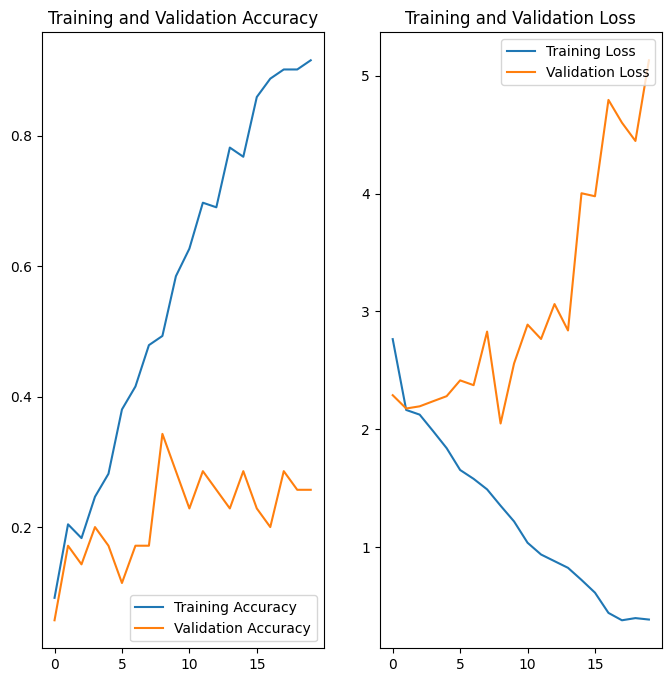

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential([
                   layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
                   layers.experimental.preprocessing.RandomRotation(0.1),
                   layers.experimental.preprocessing.RandomZoom(0.1),])

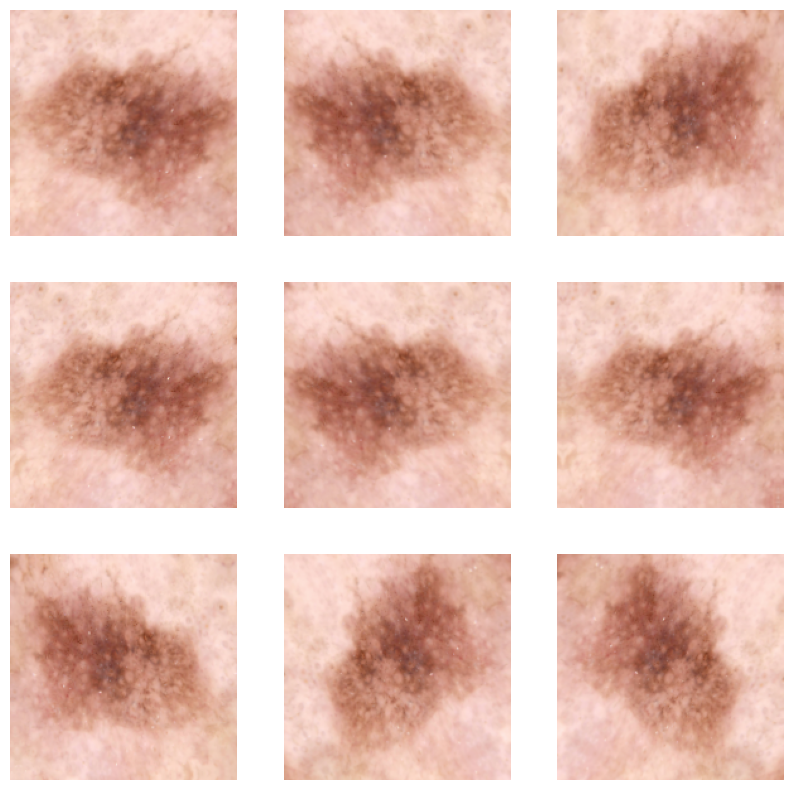

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


In [ ]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
5/5 [==============================] - 7s 974ms/step - loss: 2.8648 - accuracy: 0.0775 - val_loss: 2.2081 - val_accuracy: 0.0571
Epoch 2/20
5/5 [==============================] - 6s 1s/step - loss: 2.2615 - accuracy: 0.0915 - val_loss: 2.1935 - val_accuracy: 0.0571
Epoch 3/20
5/5 [==============================] - 5s 1s/step - loss: 2.1854 - accuracy: 0.1268 - val_loss: 2.2139 - val_accuracy: 0.0571
Epoch 4/20
5/5 [==============================] - 6s 1s/step - loss: 2.1810 - accuracy: 0.1408 - val_loss: 2.2180 - val_accuracy: 0.0571
Epoch 5/20
5/5 [==============================] - 5s 1s/step - loss: 2.1617 - accuracy: 0.1549 - val_loss: 2.2101 - val_accuracy: 0.1143
Epoch 6/20
5/5 [==============================] - 7s 1s/step - loss: 2.1581 - accuracy: 0.1972 - val_loss: 2.2261 - val_accuracy: 0.1429
Epoch 7/20
5/5 [==============================] - 5s 930ms/step - loss: 2.1183 - accuracy: 0.1901 - val_loss: 2.1877 - val_accuracy: 0.1429
Epoch 8/20
5/5 [===================

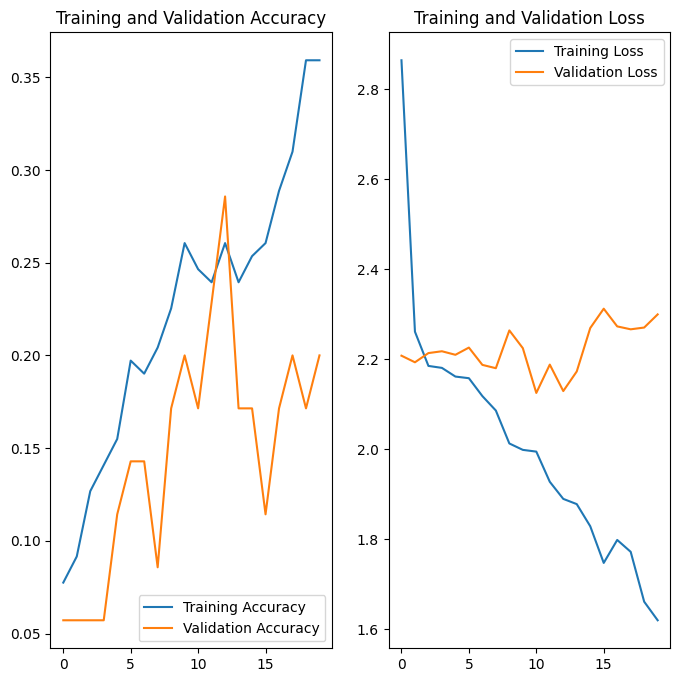

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from glob import glob
path_list = [ x for x in glob(os.path.join(data_dir_train, '*', '*.jpg')) ]
lesion_list = [ os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg')) ]
print(len(lesion_list))

177


In [ ]:
df_dict_original = dict(zip(path_list, lesion_list))
print(list(df_dict_original.items())[:2])

[('/content/gdrive/MyDrive/dataset2/Train/seborrheic keratosis/ISIC_0010938.jpg', 'seborrheic keratosis'), ('/content/gdrive/MyDrive/dataset2/Train/seborrheic keratosis/ISIC_0010876.jpg', 'seborrheic keratosis')]


In [ ]:
original_df = pd.DataFrame(list(df_dict_original.items()), columns=['Path','Label'])
original_df.head()

,Path,Label
0,/content/gdrive/MyDrive/dataset2/Train/seborrh...,seborrheic keratosis
1,/content/gdrive/MyDrive/dataset2/Train/seborrh...,seborrheic keratosis
2,/content/gdrive/MyDrive/dataset2/Train/seborrh...,seborrheic keratosis
3,/content/gdrive/MyDrive/dataset2/Train/seborrh...,seborrheic keratosis
4,/content/gdrive/MyDrive/dataset2/Train/seborrh...,seborrheic keratosis


In [ ]:
original_df[['Label']].value_counts()

Label                     
pigmented benign keratosis    26
squamous cell carcinoma       22
basal cell carcinoma          21
actinic keratosis             20
nevus                         20
seborrheic keratosis          18
vascular lesion               18
dermatofibroma                16
melanoma                      16
dtype: int64

In [ ]:
original_df[['Label']].value_counts(normalize=True)

Label                     
pigmented benign keratosis    0.146893
squamous cell carcinoma       0.124294
basal cell carcinoma          0.118644
actinic keratosis             0.112994
nevus                         0.112994
seborrheic keratosis          0.101695
vascular lesion               0.101695
dermatofibroma                0.090395
melanoma                      0.090395
dtype: float64

In [ ]:
!pip install Augmentor

In [ ]:
path_to_training_dataset=str(data_dir_train) + '/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 20 image(s) found.
Output directory set to /content/gdrive/MyDrive/dataset2/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EE1333D3BB0>: 100%|██████████| 500/500 [00:28<00:00, 17.45 Samples/s]


Initialised with 21 image(s) found.
Output directory set to /content/gdrive/MyDrive/dataset2/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EE133499360>: 100%|██████████| 500/500 [00:24<00:00, 20.02 Samples/s]


Initialised with 16 image(s) found.
Output directory set to /content/gdrive/MyDrive/dataset2/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EE1333DBDC0>: 100%|██████████| 500/500 [00:23<00:00, 21.38 Samples/s]


Initialised with 16 image(s) found.
Output directory set to /content/gdrive/MyDrive/dataset2/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7EE133393E80>: 100%|██████████| 500/500 [01:56<00:00,  4.29 Samples/s]


Initialised with 20 image(s) found.
Output directory set to /content/gdrive/MyDrive/dataset2/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x7EE13339B400>: 100%|██████████| 500/500 [00:49<00:00, 10.16 Samples/s]


Initialised with 26 image(s) found.
Output directory set to /content/gdrive/MyDrive/dataset2/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EE133EFA7D0>: 100%|██████████| 500/500 [00:23<00:00, 21.62 Samples/s]


Initialised with 18 image(s) found.
Output directory set to /content/gdrive/MyDrive/dataset2/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7EE13339B340>: 100%|██████████| 500/500 [00:51<00:00,  9.75 Samples/s]


Initialised with 22 image(s) found.
Output directory set to /content/gdrive/MyDrive/dataset2/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EE133323A30>: 100%|██████████| 500/500 [00:28<00:00, 17.56 Samples/s]


Initialised with 18 image(s) found.
Output directory set to /content/gdrive/MyDrive/dataset2/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7EE133393D30>: 100%|██████████| 500/500 [00:23<00:00, 21.37 Samples/s]


In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [ ]:

path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new[:2]

['/content/gdrive/MyDrive/dataset2/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010872.jpg_bf55c302-d286-4ae2-b573-5e586e273ee3.jpg',
 '/content/gdrive/MyDrive/dataset2/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010876.jpg_49317086-3d5c-4440-97d3-7fce046abed4.jpg']

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[:2]

['seborrheic keratosis', 'seborrheic keratosis']

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)
new_df.shape

<ipython-input-34-c1e5e8a551a2>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


(4677, 2)

In [ ]:
new_df.head()

,Path,Label
0,/content/gdrive/MyDrive/dataset2/Train/seborrh...,seborrheic keratosis
1,/content/gdrive/MyDrive/dataset2/Train/seborrh...,seborrheic keratosis
2,/content/gdrive/MyDrive/dataset2/Train/seborrh...,seborrheic keratosis
3,/content/gdrive/MyDrive/dataset2/Train/seborrh...,seborrheic keratosis
4,/content/gdrive/MyDrive/dataset2/Train/seborrh...,seborrheic keratosis


In [ ]:
new_df['Label'].value_counts(normalize=True)

pigmented benign keratosis    0.112465
squamous cell carcinoma       0.111610
basal cell carcinoma          0.111396
actinic keratosis             0.111182
nevus                         0.111182
seborrheic keratosis          0.110755
vascular lesion               0.110755
dermatofibroma                0.110327
melanoma                      0.110327
Name: Label, dtype: float64

In [ ]:
new_df['Label'].value_counts()

pigmented benign keratosis    526
squamous cell carcinoma       522
basal cell carcinoma          521
actinic keratosis             520
nevus                         520
seborrheic keratosis          518
vascular lesion               518
dermatofibroma                516
melanoma                      516
Name: Label, dtype: int64

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4677 files belonging to 9 classes.
Using 3742 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4677 files belonging to 9 classes.
Using 935 files for validation.


In [ ]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
117/117 [==============================] - 183s 2s/step - loss: 1.8910 - accuracy: 0.2878 - val_loss: 1.3911 - val_accuracy: 0.4417
Epoch 2/30
117/117 [==============================] - 173s 1s/step - loss: 1.2563 - accuracy: 0.5278 - val_loss: 1.1679 - val_accuracy: 0.5957
Epoch 3/30
117/117 [==============================] - 168s 1s/step - loss: 0.8668 - accuracy: 0.6865 - val_loss: 0.6078 - val_accuracy: 0.7786
Epoch 4/30
117/117 [==============================] - 167s 1s/step - loss: 0.6176 - accuracy: 0.7817 - val_loss: 0.3603 - val_accuracy: 0.8749
Epoch 5/30
117/117 [==============================] - 171s 1s/step - loss: 0.4005 - accuracy: 0.8602 - val_loss: 0.1872 - val_accuracy: 0.9551
Epoch 6/30
117/117 [==============================] - 173s 1s/step - loss: 0.2980 - accuracy: 0.9011 - val_loss: 0.1542 - val_accuracy: 0.9572
Epoch 7/30
117/117 [==============================] - 172s 1s/step - loss: 0.2368 - accuracy: 0.9252 - val_loss: 0.2777 - val_accuracy: 0.9037

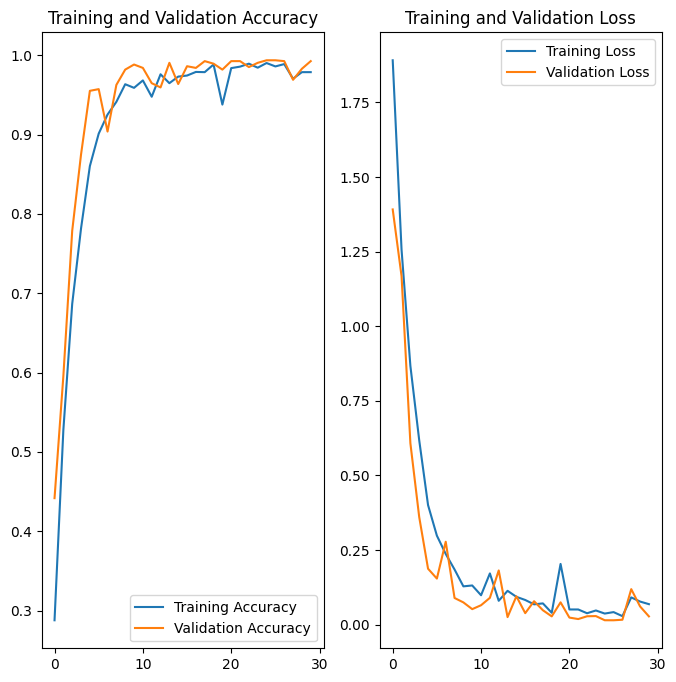

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/dataset/trained_model.keras")

In [ ]:
model.save("/content/drive/MyDrive/dataset/trained_model.h5")